In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import spherical_stats

PROJECT_ROOT = os.path.abspath(os.pardir)
sys.path.append(PROJECT_ROOT)

%matplotlib widget

In [2]:
lut = np.load('data/msKappaLUT.npy')
d = np.load('data/msKappaAxes.npz')
energyArray = d['arr_0']
stepsizeArray = d['arr_1']
densityArray = d['arr_2']

Text(0.5, 1.0, '$E=6.110e+00$ and $\\Delta s=5.338e-02$')

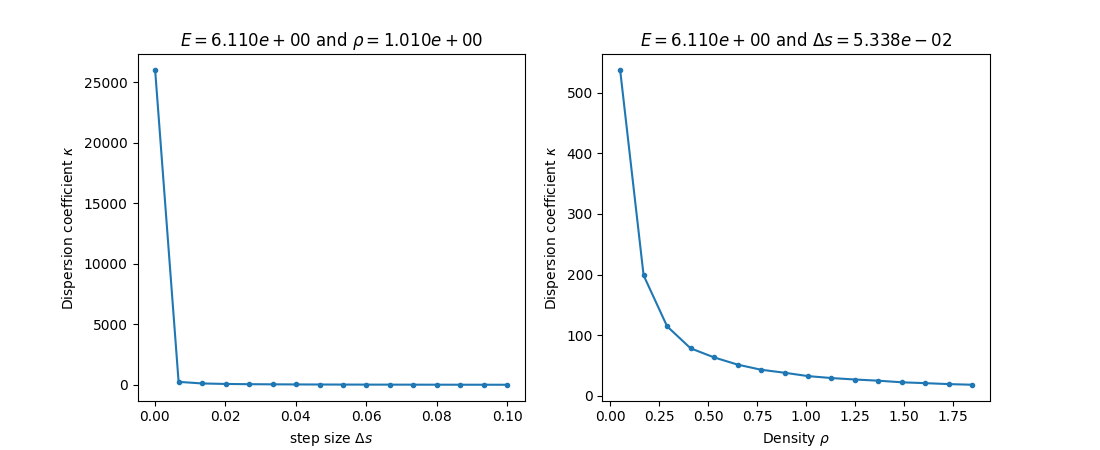

In [3]:
energyIndex = energyArray.size//2
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

# Data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4.5))

ax1.plot(stepsizeArray, lut[energyIndex, :, densityIndex, 0], '.-')
ax1.set_xlabel('step size $\Delta s$')
ax1.set_ylabel('Dispersion coefficient $\kappa$')
ax1.set_title(f'$E={energyArray[energyIndex]:.3e}$ and $\\rho={densityArray[densityIndex]:.3e}$')

ax2.plot(densityArray, lut[energyIndex, stepsizeIndex, :, 0], '.-')
ax2.set_xlabel('Density $\\rho$')
ax2.set_ylabel('Dispersion coefficient $\kappa$')
ax2.set_title(f'$E={energyArray[energyIndex]:.3e}$ and $\Delta s={stepsizeArray[stepsizeIndex]:.3e}$')

# Large dispersion coefficient, small spread.

In [6]:
energyIndex = energyArray.size//2
stepsizeIndex = stepsizeArray.size//2
densityIndex = densityArray.size//2

mu = np.array((0.0, 0.0, 1.0), dtype=float)
kappa = lut[energyIndex, stepsizeIndex, densityIndex, 0]

vmf = spherical_stats._vmf.VMF(mu, kappa)

samples = vmf.rvs(size = 750)

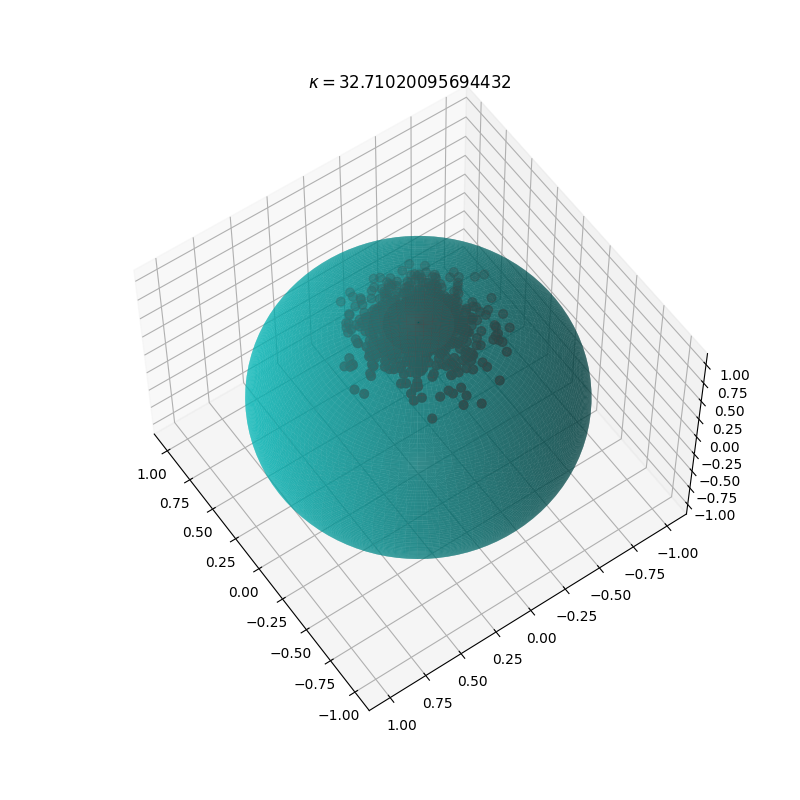

In [7]:

N_GRID = 100

x, y, z = spherical_stats.sphere(n_grid = N_GRID)

plt.rcParams['figure.figsize'] = [8, 8]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=1)
ax.set_title(f'$\kappa = {kappa}$')

ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], color="r", s=40)
ax.view_init(57, 145)
plt.show()
